In [3]:
# pip install openpyxl

Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [50]:
df=pd.read_excel("D:\Data_Science\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [51]:
df.rename(columns={'ID#':'Id','Award?':'Award'},inplace=True)
df.set_index('Id',inplace=True)

In [20]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Descriptive Statistics

In [52]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


### Checking unique values of cc miles

In [54]:
## Checking unique values of cc miles

print('Unique_cc1',df.cc1_miles.unique())
print('Unique_cc2',df.cc2_miles.unique())
print('Unique_cc3',df.cc3_miles.unique())

Unique_cc1 [1 4 3 2 5]
Unique_cc2 [1 2 3]
Unique_cc3 [1 3 2 4 5]


### Missing values

In [55]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

#### NO missing values present

### Checking duplicate values

In [56]:
df.duplicated().sum()

1

In [57]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,


# Exploratory Data Analysis

In [62]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Plotting Histogram

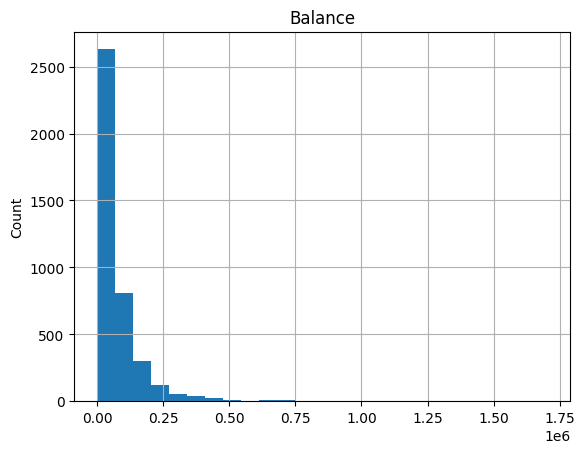

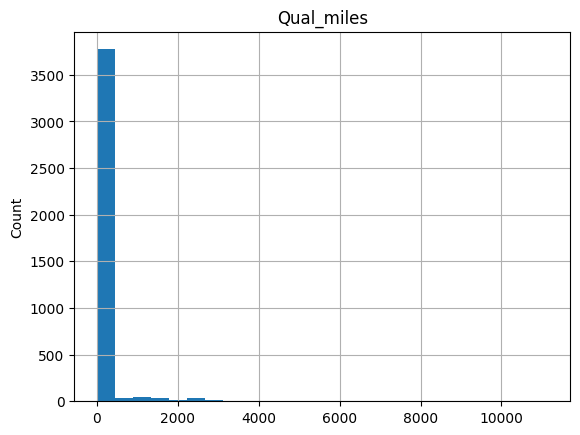

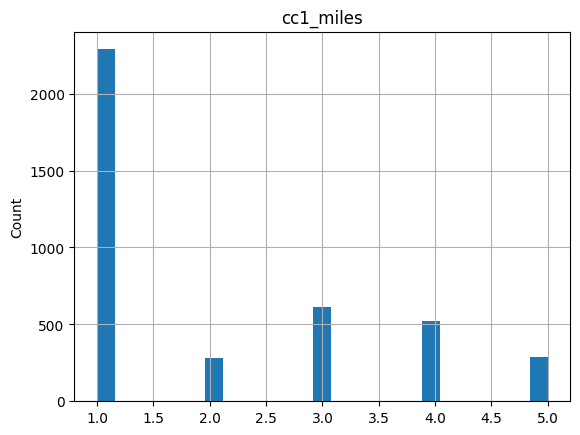

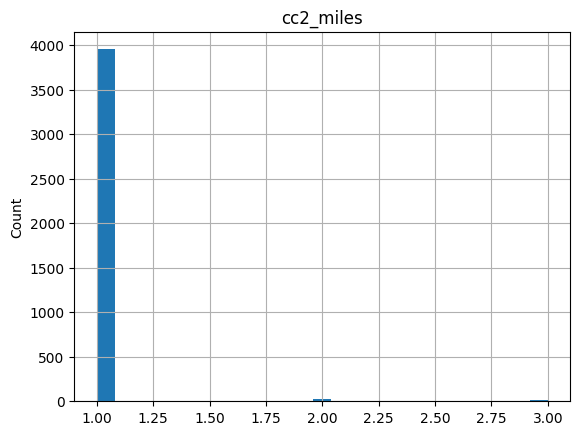

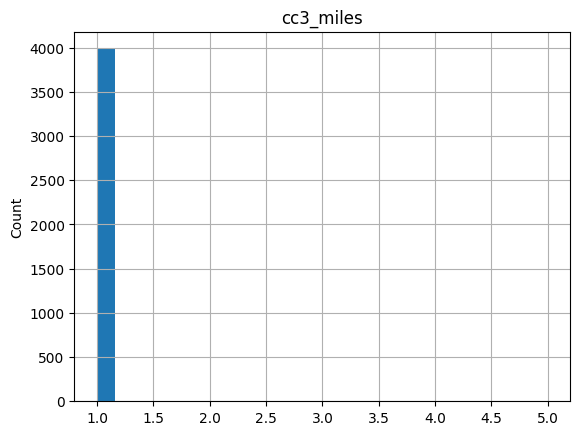

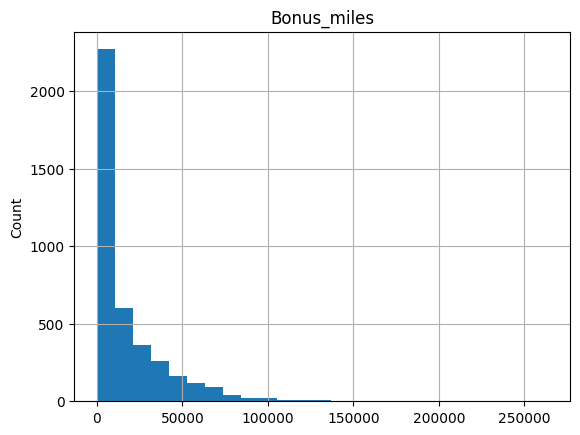

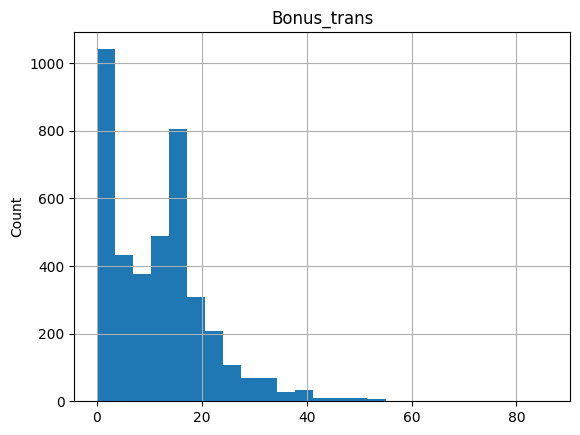

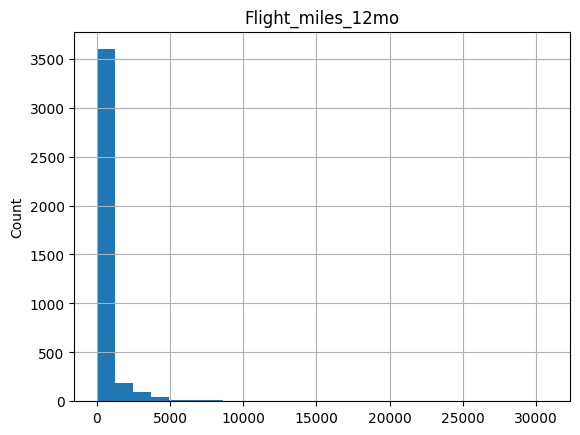

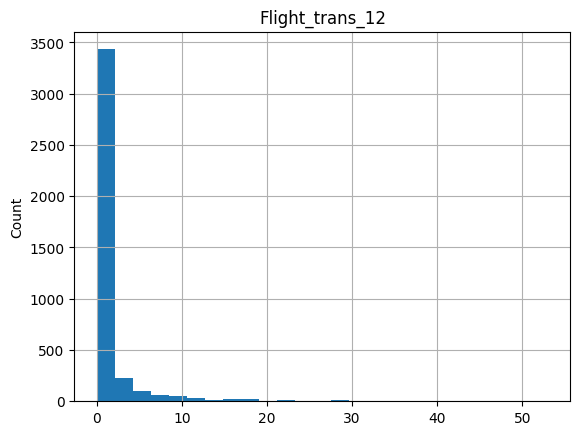

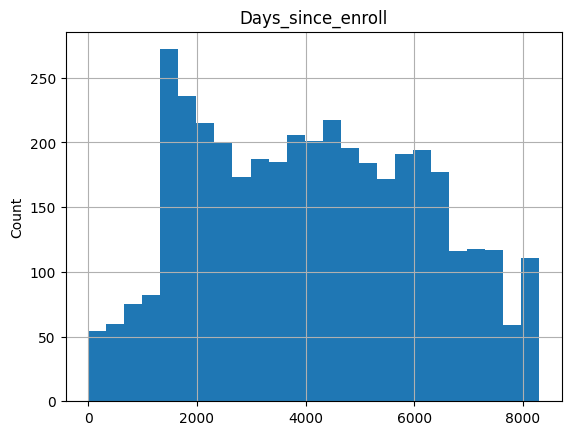

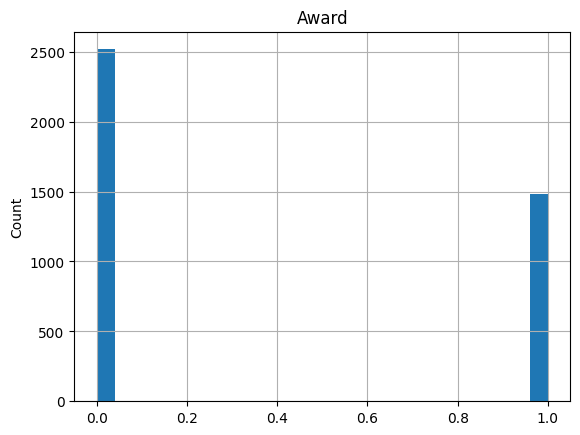

In [63]:
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Kernel density for every feature

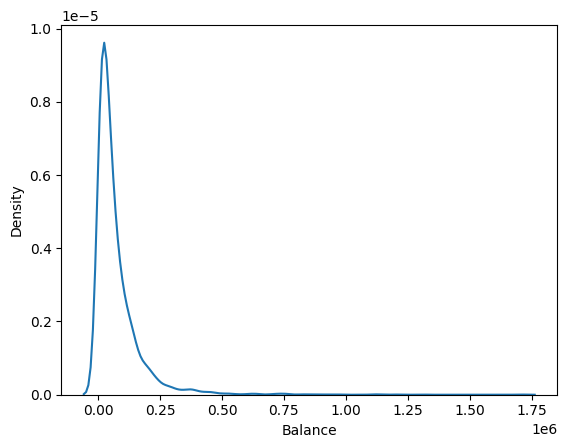

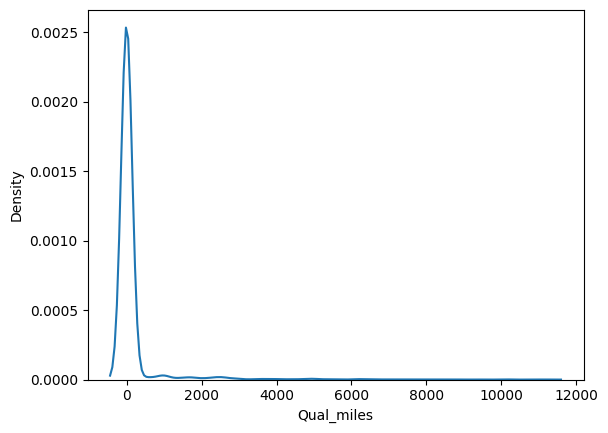

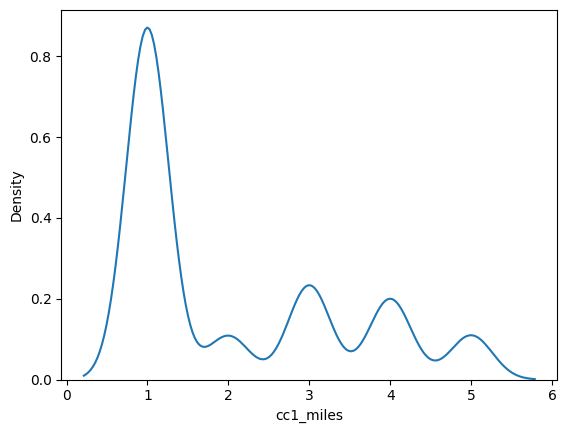

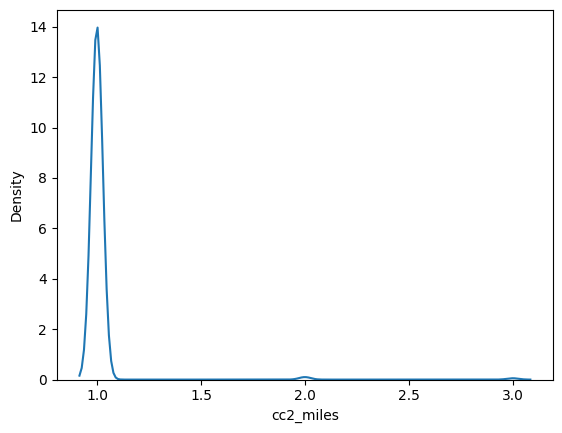

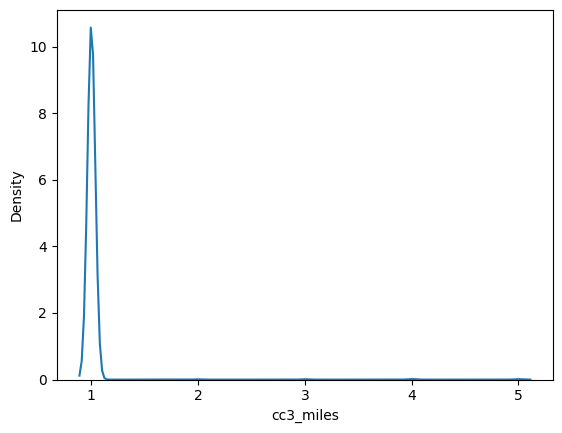

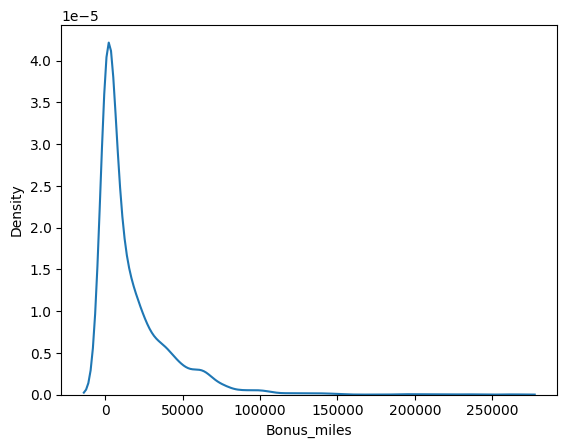

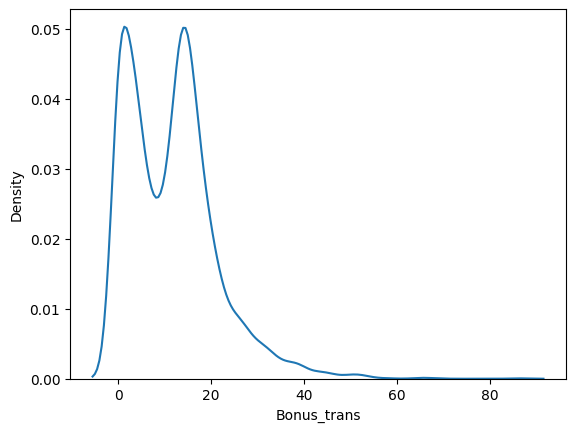

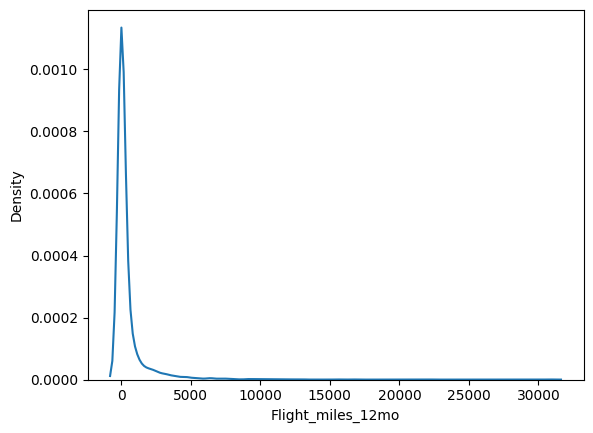

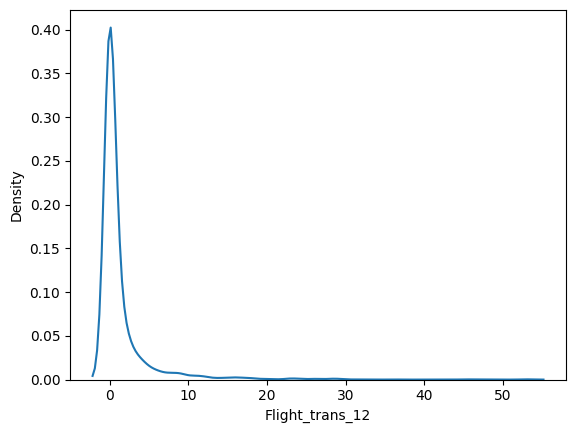

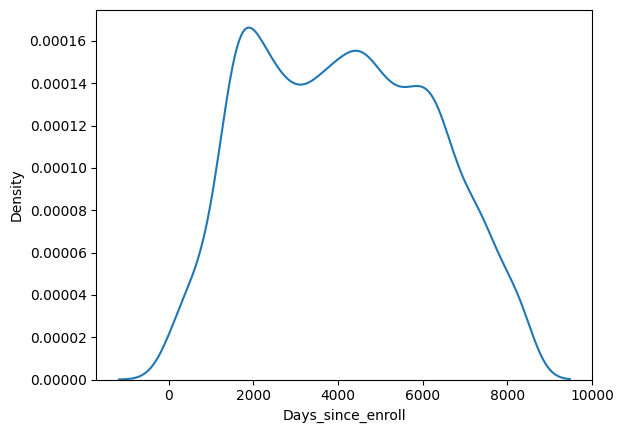

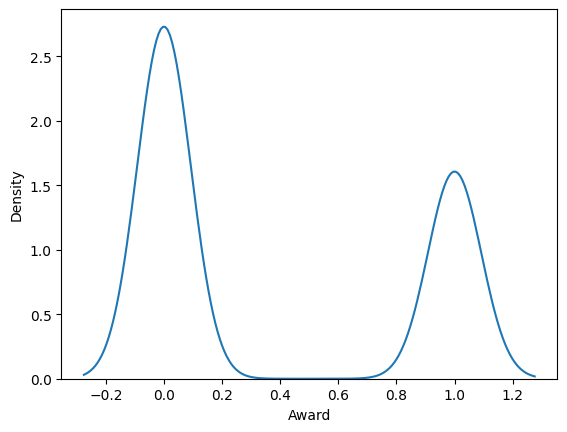

In [64]:
for i in df.columns:
    sns.kdeplot(df[i])
    plt.show()

# Plotting Boxplot

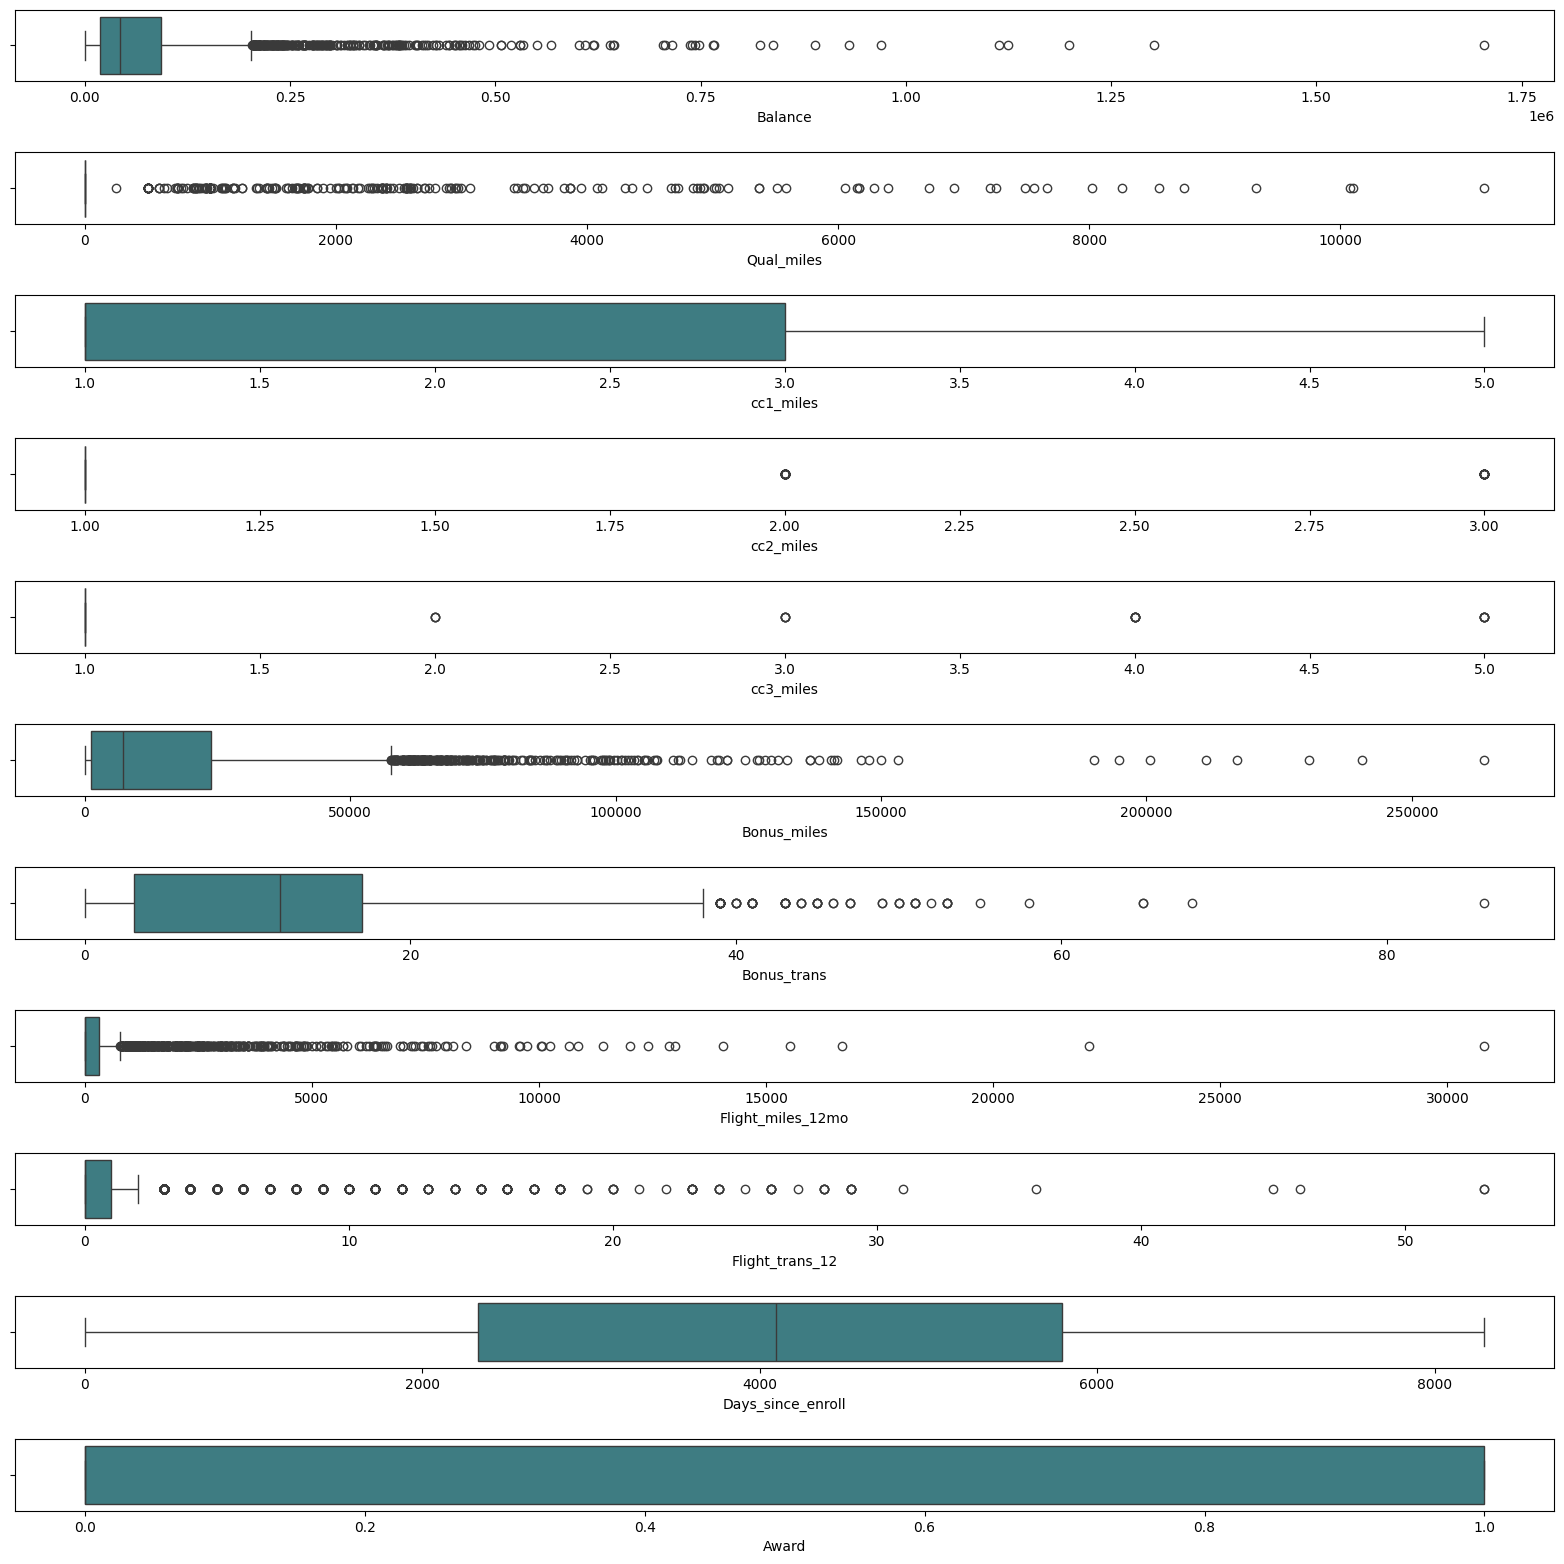

In [68]:
fig,ax=plt.subplots(11,1,figsize=(16,16),sharex=False,sharey=False)
c=0
for i in df.columns:
    sns.boxplot(x=i,data=df,palette='crest',ax=ax[c])
    c+=1
plt.tight_layout(pad=2)


<Axes: >

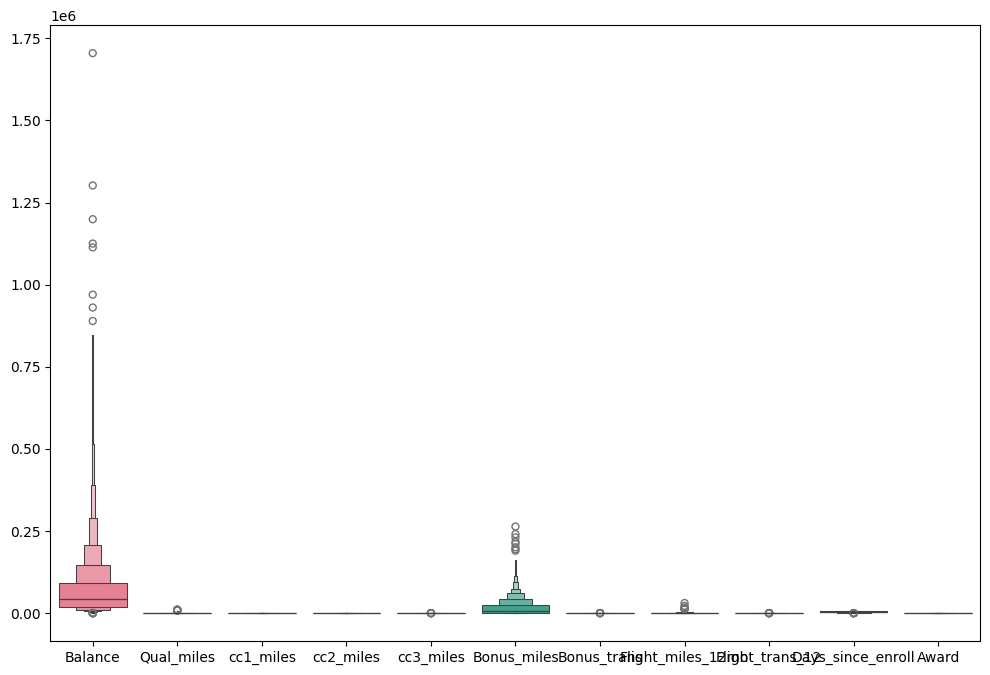

In [70]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=df)

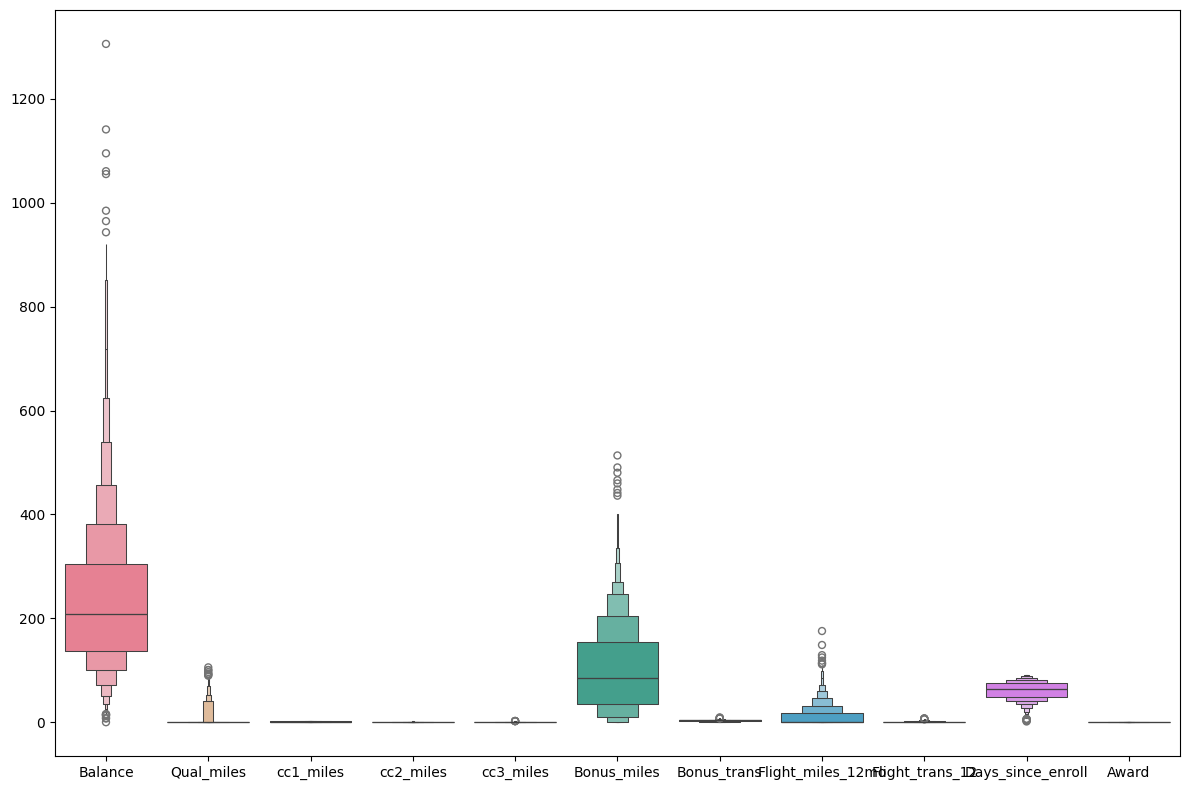

In [72]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=np.sqrt(df))
plt.tight_layout()

## correlation Analysis

In [73]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


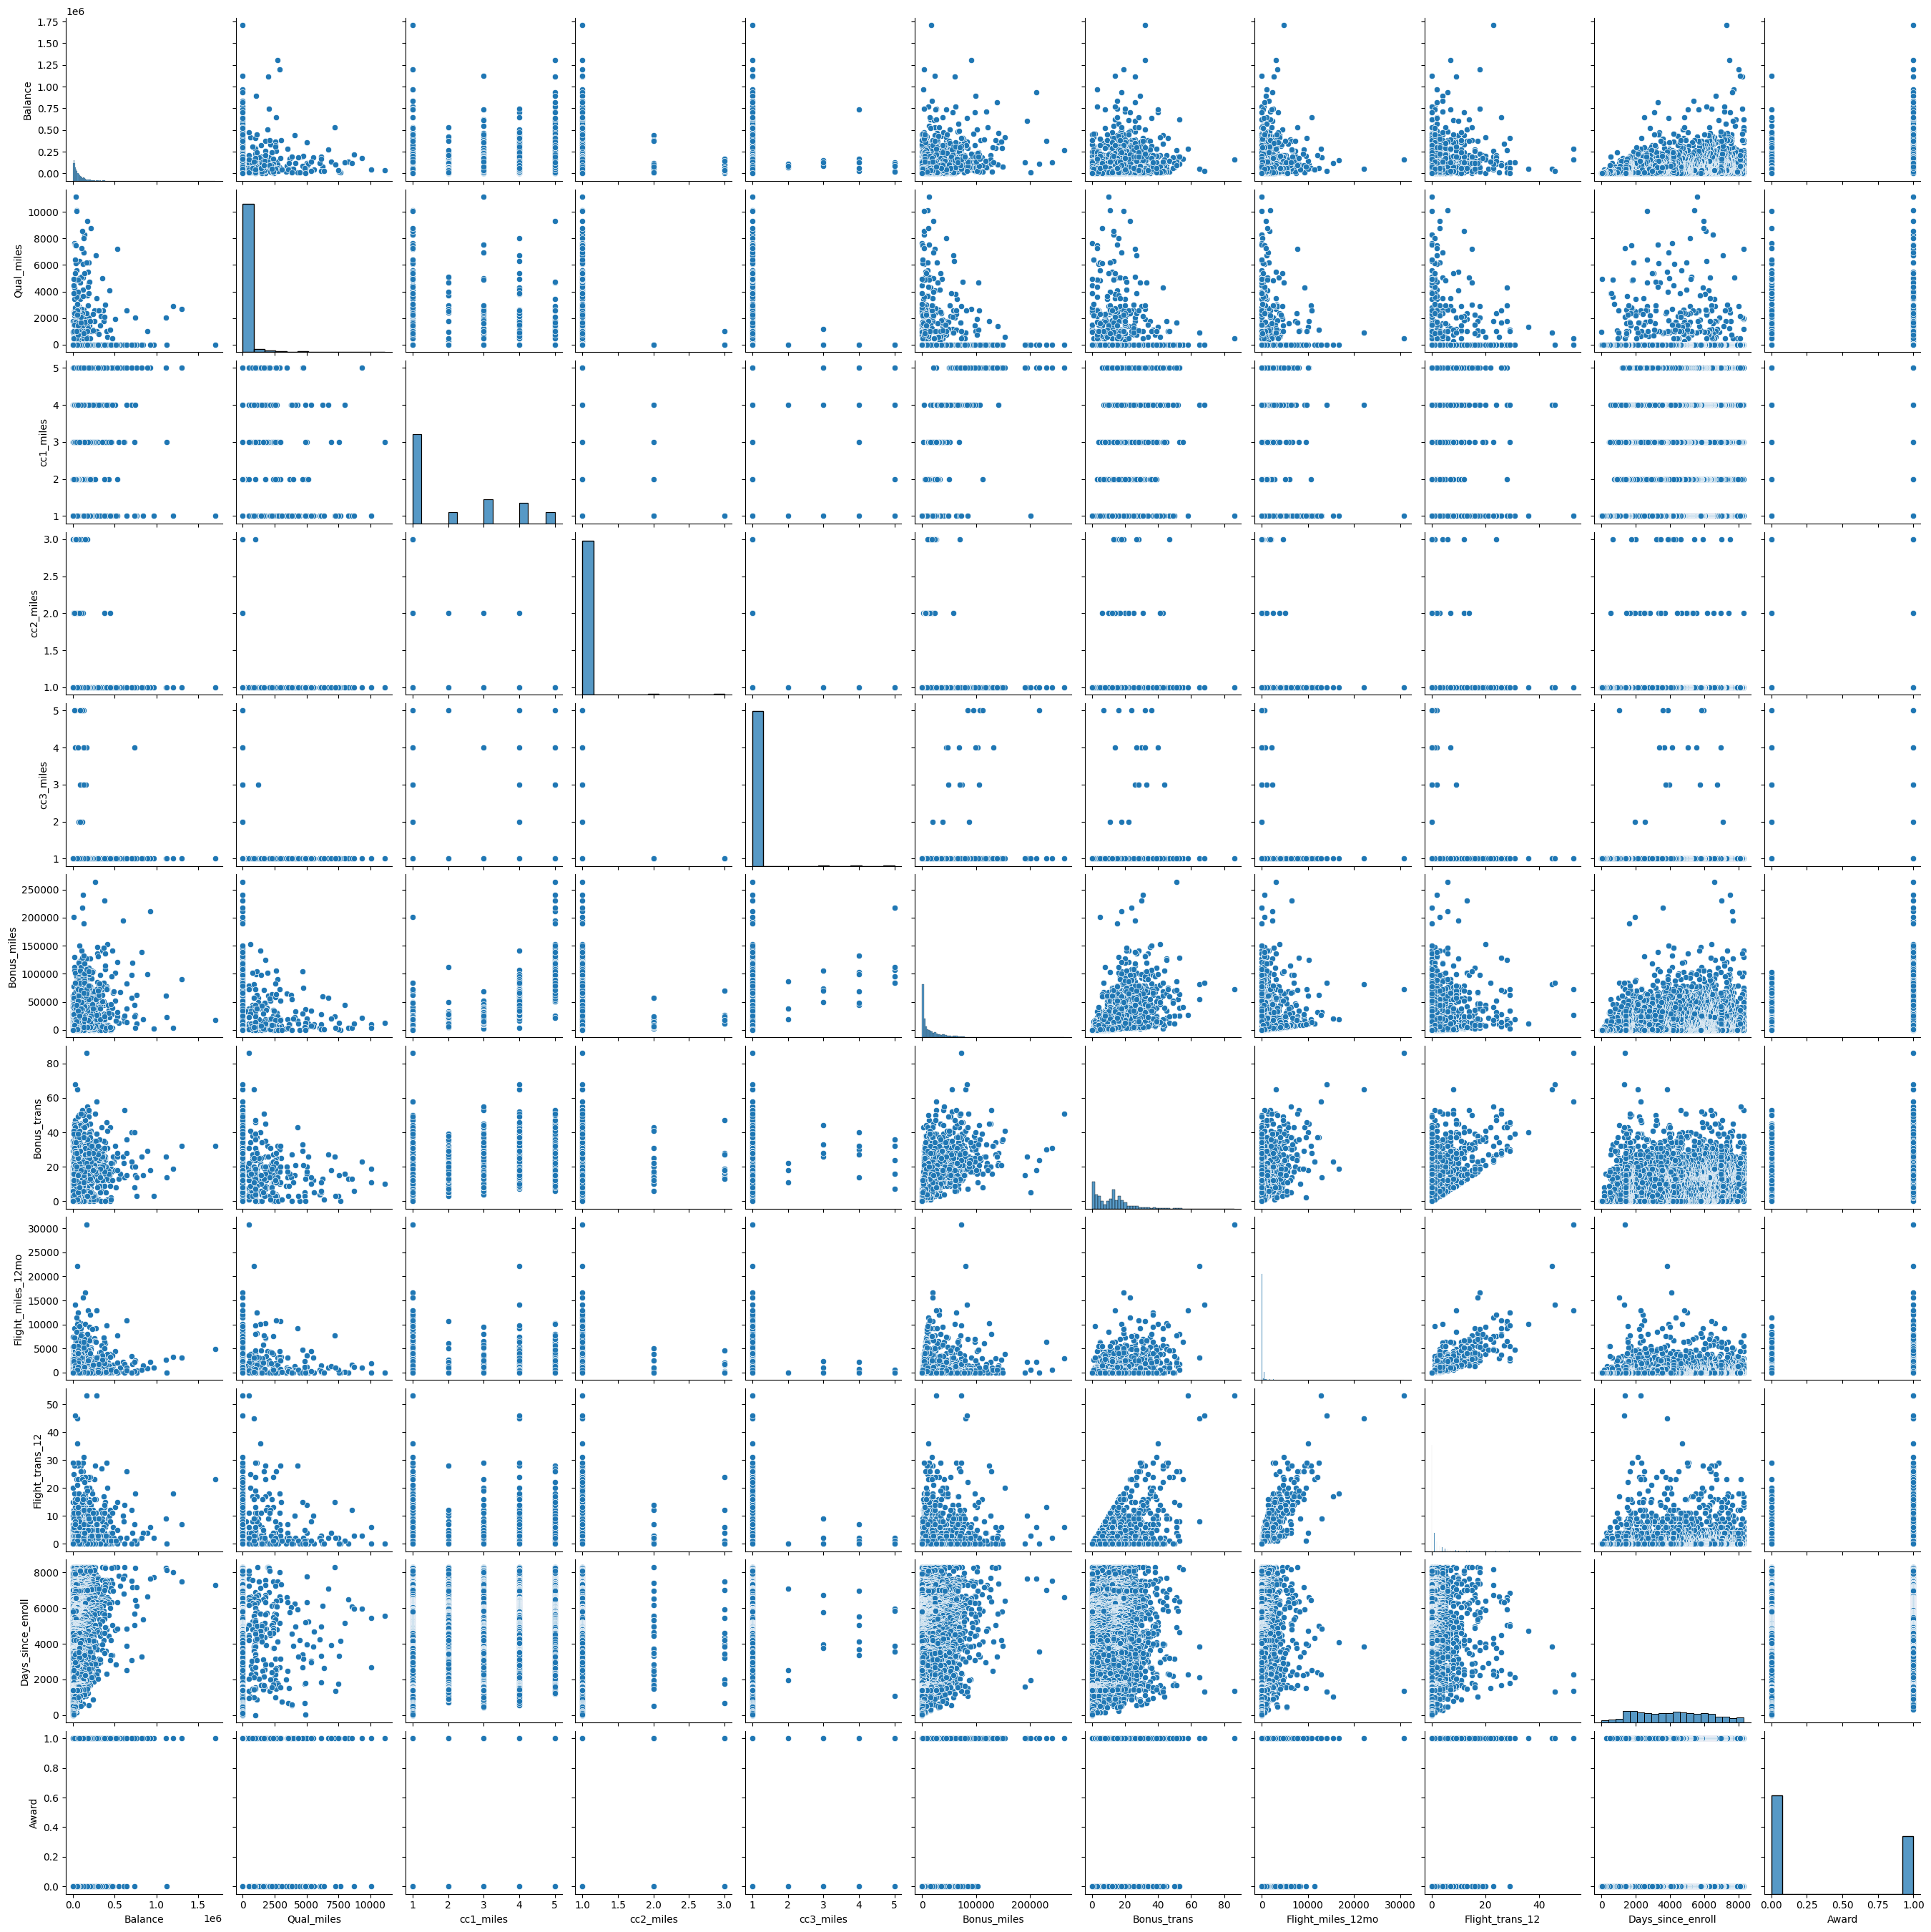

In [74]:
sns.pairplot(df)


<Axes: >

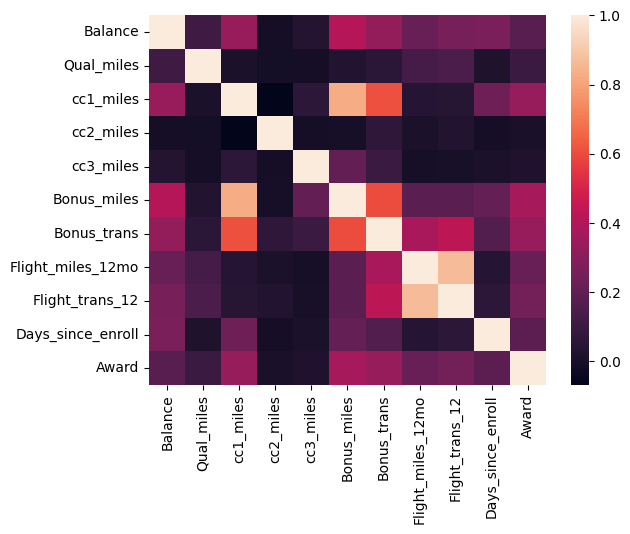

In [75]:
sns.heatmap(df.corr())

## Data Preprocessing

In [77]:
# Standardizing data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)
df_scaled.shape

(3998, 11)

## Finding best cluster using wcss and elbow method

In [78]:
from sklearn.cluster import KMeans

In [79]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

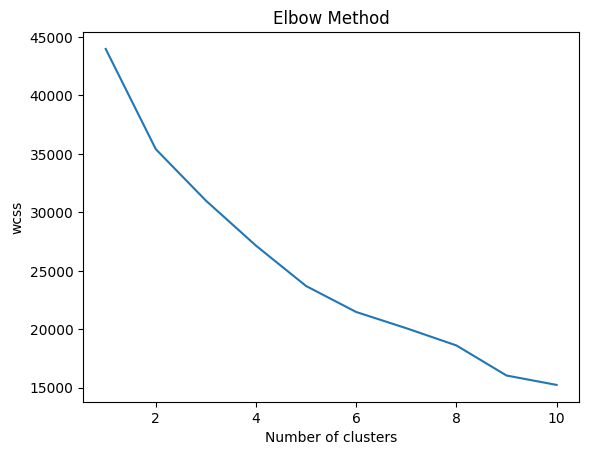

In [80]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

#### By seeing grapgh we can conclude no of best clusters can bet between 6 to 8 so we are taking 6

# KMeans Model Building

In [82]:
kmodel=KMeans(n_clusters=6,random_state=42)
predict_new=kmodel.fit_predict(df_scaled)
predict_new

array([1, 1, 1, ..., 0, 1, 1])

In [83]:
kmodel.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [84]:
data=df.copy()
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [85]:
data['new_cluster']=predict_new
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,new_cluster
Id,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [86]:
data.new_cluster.unique()

array([1, 5, 0, 4, 2, 3])

# Hierarchical Clustering

In [90]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


### Function to find best linkage, no of cluster

In [88]:

def hierarchical_clustering_best(X, max_clusters=10, linkage_methods=['ward', 'complete', 'average', 'single']):
    best_silhouette_score = -1
    best_model = None
    best_num_clusters = None
    best_linkage_method = None
    
    for linkage_method in linkage_methods:
        for n_clusters in range(2, max_clusters + 1):
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            labels = model.fit_predict(X)
            silhouette = silhouette_score(X, labels)
            
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_model = model
                best_num_clusters = n_clusters
                best_linkage_method = linkage_method
                
    return best_model, best_num_clusters, best_linkage_method

# Example usage:
# X is your dataset
# best_model, best_num_clusters, best_linkage_method = hierarchical_clustering_best(X)


In [89]:
hierarchical_clustering_best(df_scaled)

(AgglomerativeClustering(linkage='single'), 2, 'single')

# Agglomerative Model Building

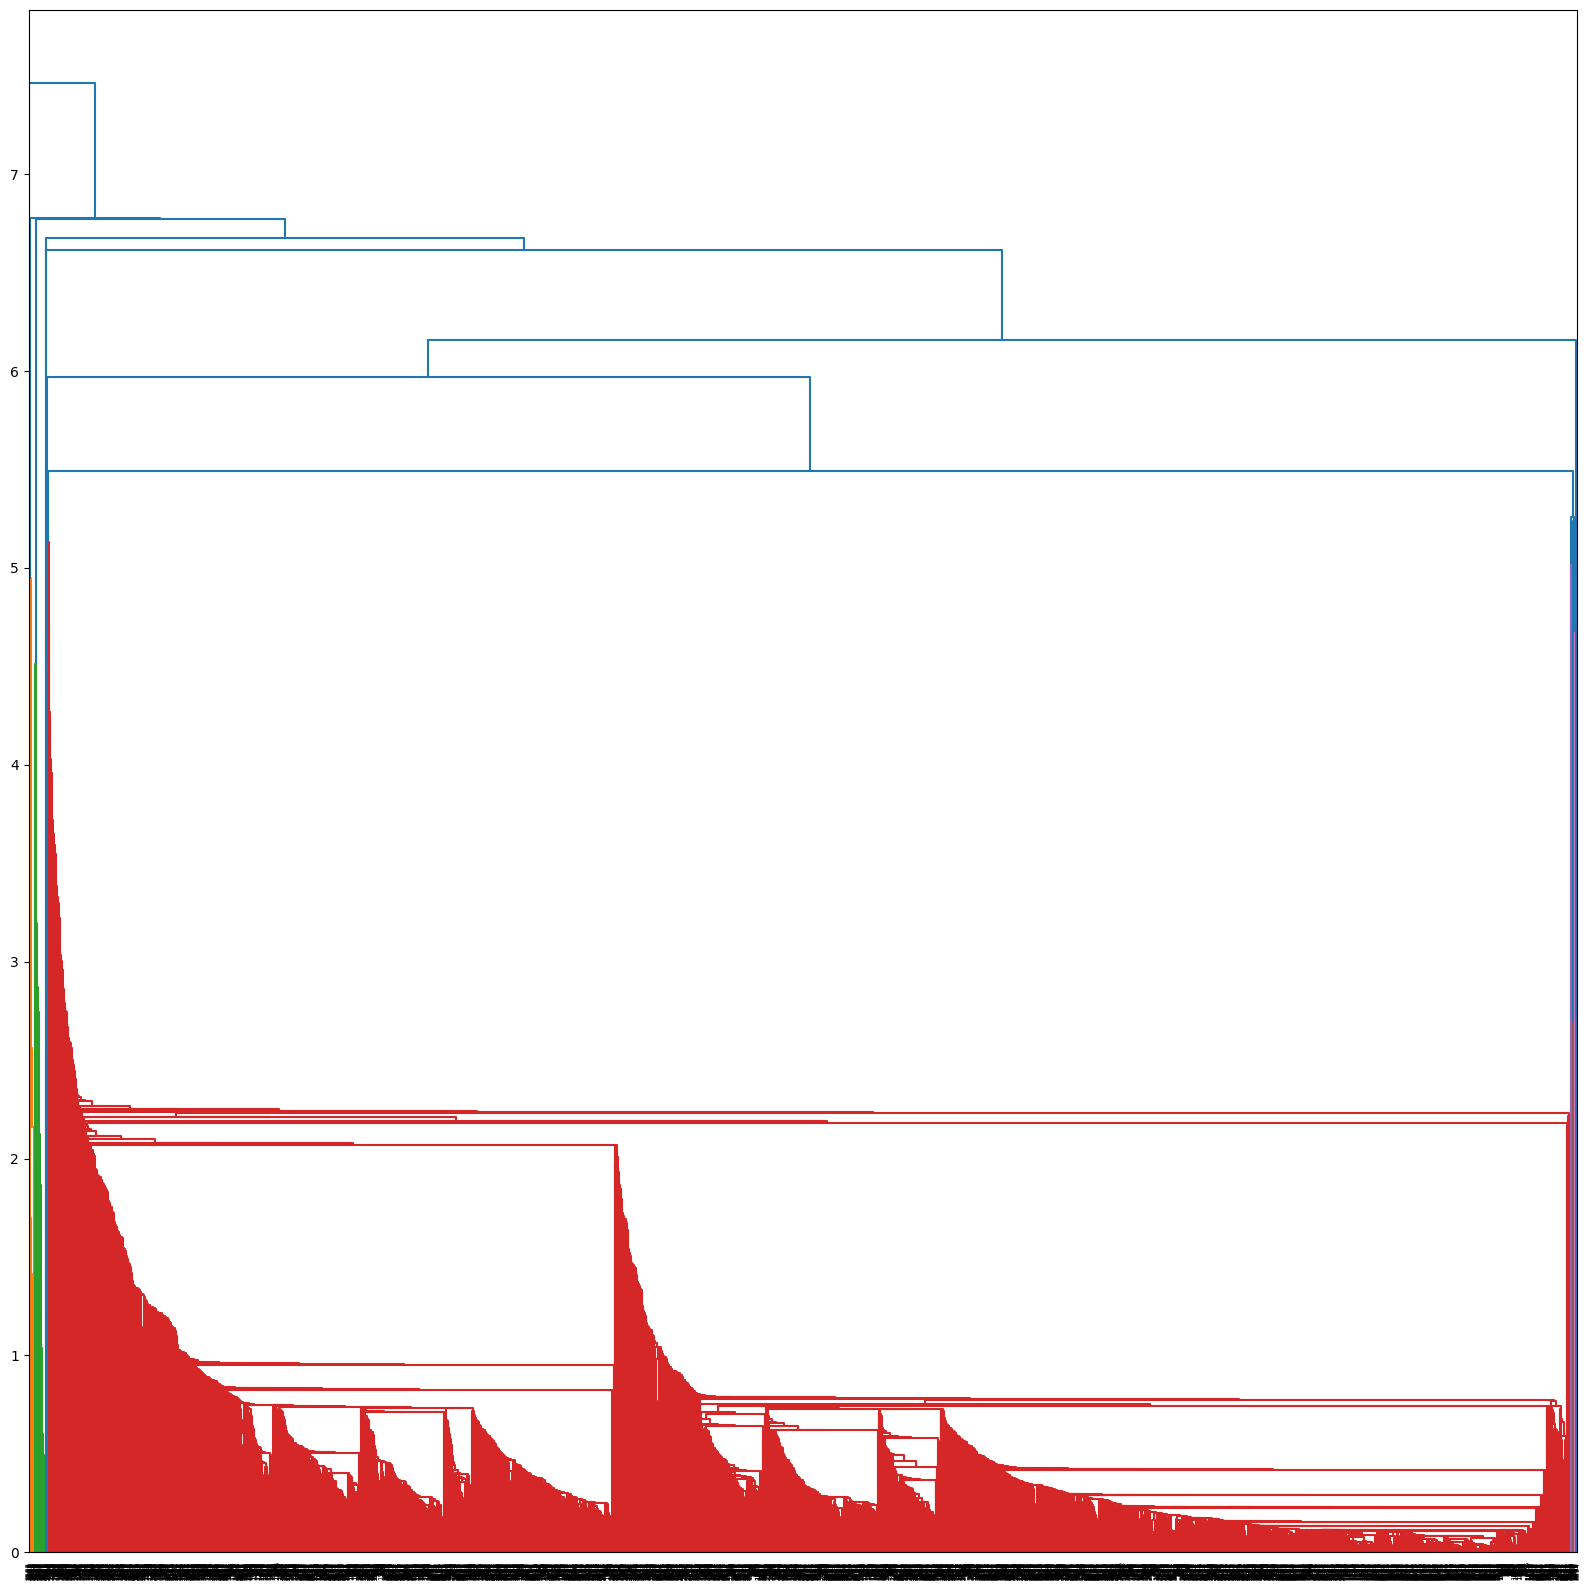

In [93]:
plt.figure(figsize=(16,16))
dendogram=sch.dendrogram(sch.linkage(df_scaled,method='single'))
plt.tight_layout()

In [95]:
agg_model=AgglomerativeClustering(n_clusters=2,linkage='single',metric='euclidean')
labels=agg_model.fit_predict(df_scaled)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
data=df.copy()
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Id,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [99]:
data['labels']=labels
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,labels
Id,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [100]:
data['labels'].value_counts()

0    3997
1       1
Name: labels, dtype: int64

# DBScan Clustering

In [107]:
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [103]:
db=DBSCAN(eps=0.5,min_samples=3)
y_label=db.fit_predict(df_scaled)
y_labels

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [106]:
silhouette_score(df_scaled,y_label)

-0.11463331205036746

# Function For Hyperparameter tunning

In [108]:

def find_optimal_epsilon(X, min_samples, plot=True):
    nn = NearestNeighbors(n_neighbors=min_samples)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(distances)
        plt.title("Sorted kth distance of each point to its {}th nearest neighbor".format(min_samples))
        plt.xlabel("Poinfints sorted by distance")
        plt.ylabel("{}th nearest neighbor distance".format(min_samples))
        plt.show()
    
    return distances

# Usage example:
# optimal_eps = find_optimal_epsilon(X, min_samples=4)


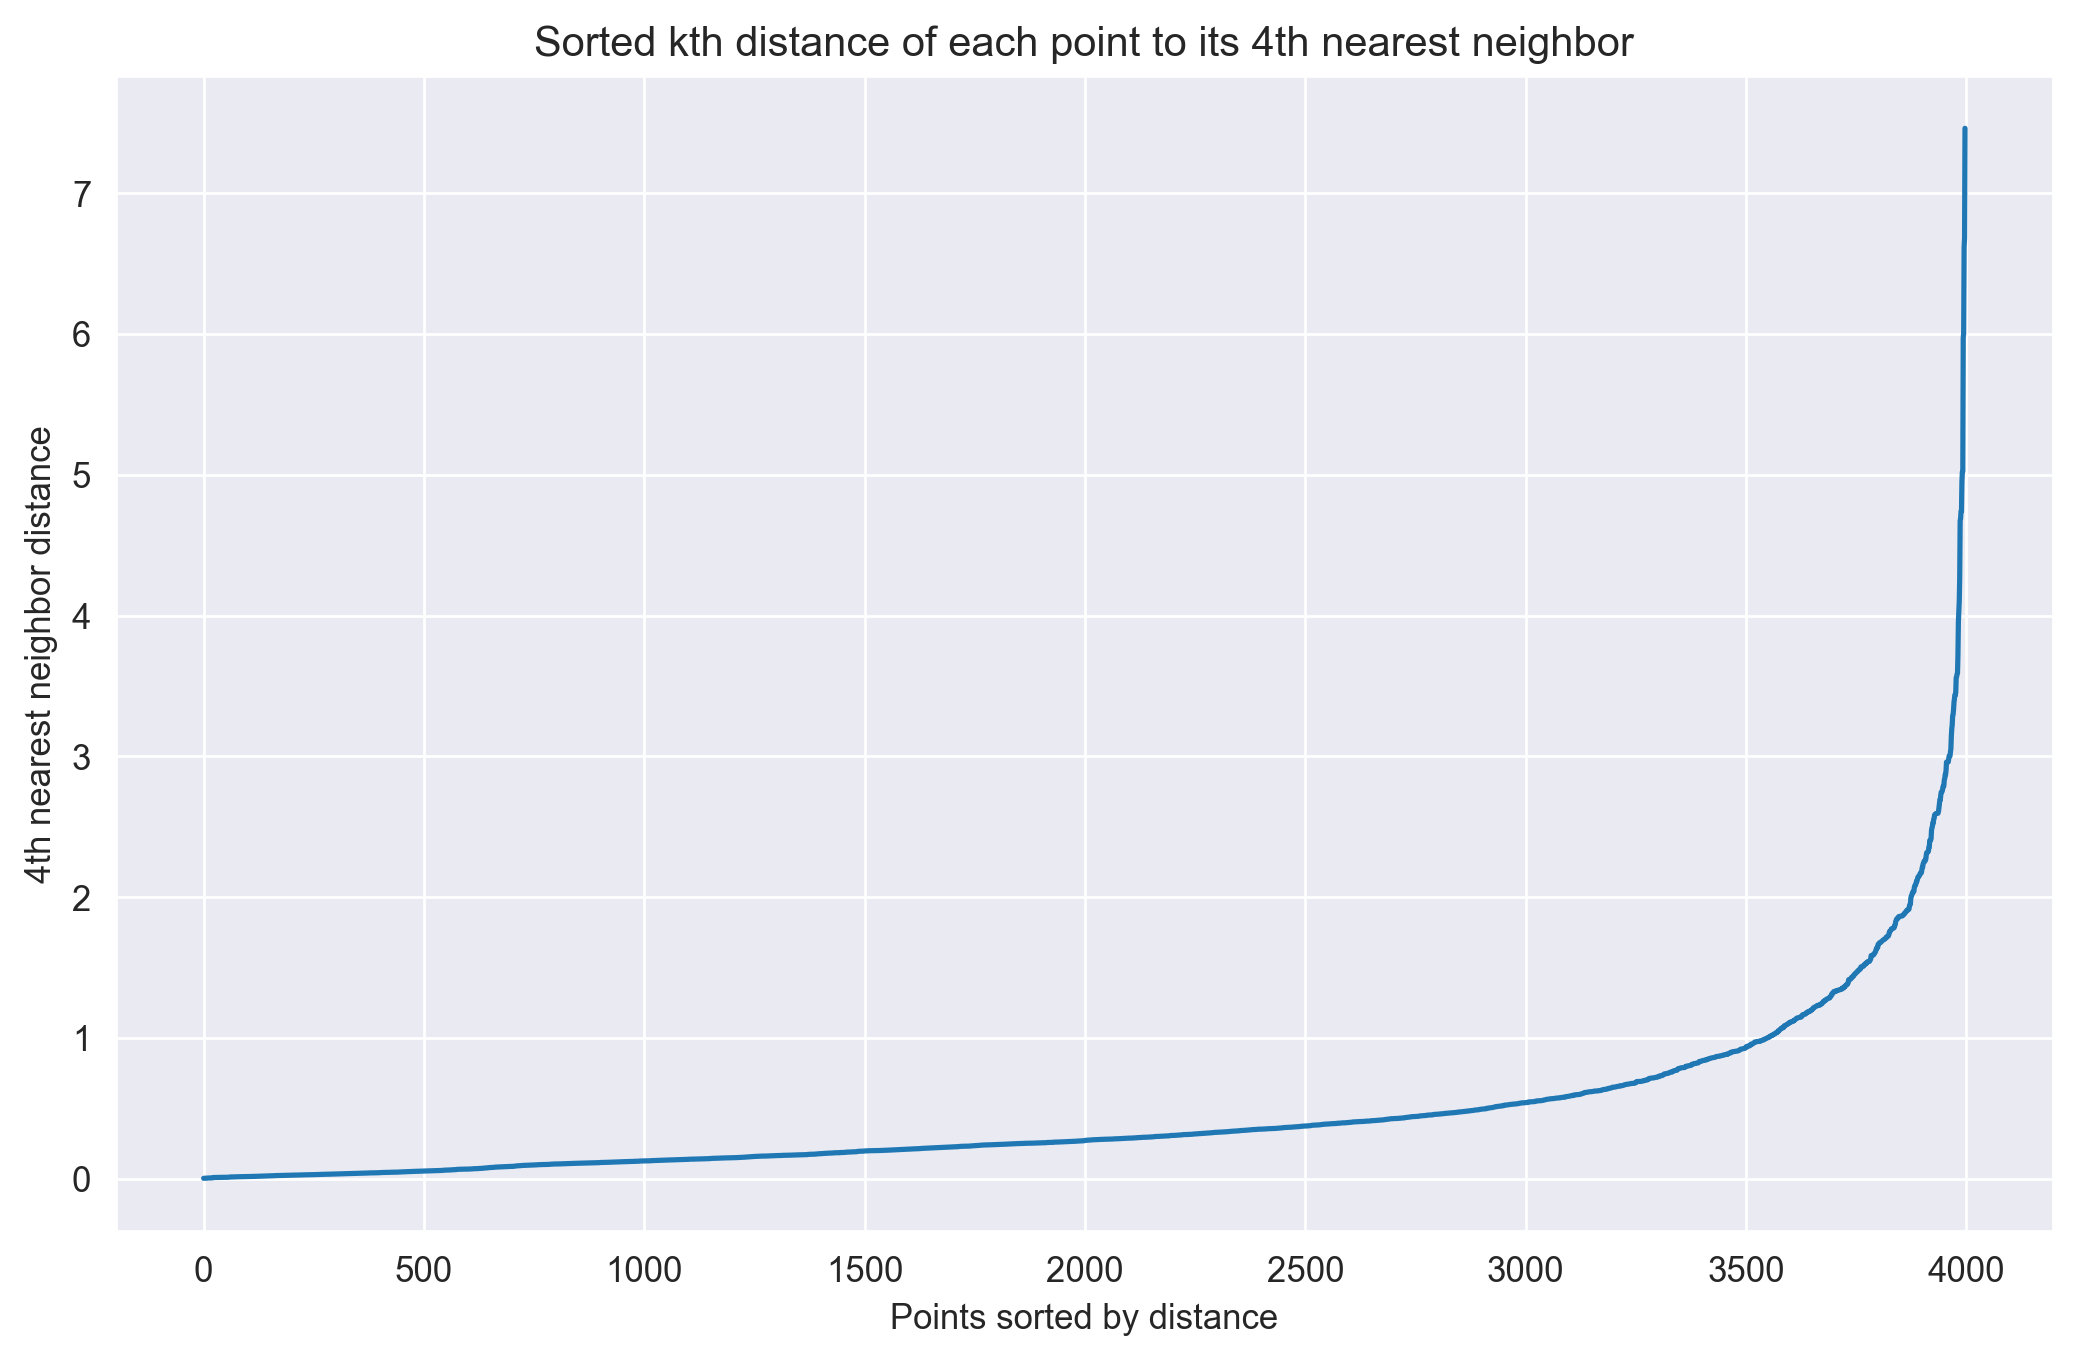

array([2.26429338e-03, 2.26429338e-03, 2.70567023e-03, ...,
       6.61619449e+00, 6.67812374e+00, 7.46068077e+00])

In [109]:
find_optimal_epsilon(df_scaled,4)

# CReating Final Model

In [110]:
db=DBSCAN(eps=2,min_samples=4)
y_label=db.fit_predict(df_scaled)
y_label

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [111]:
silhouette_score(df_scaled,y_label)

0.2523754796460787